In [1]:
import numpy as np
import pandas as pd

In [2]:
# Code for beautyfying the plots
#@markdown This sets the styles of the plotting (default is styled like plots from [FiveThirtyeight.com](https://fivethirtyeight.com/)
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import matplotlib.axes as axes
from matplotlib.patches import Ellipse
#%matplotlib inline
import seaborn as sns; sns.set_context('notebook')

class _TFColor(object):
    """Enum of colors used in TF docs."""
    red = '#F15854'
    blue = '#5DA5DA'
    orange = '#FAA43A'
    green = '#60BD68'
    pink = '#F17CB0'
    brown = '#B2912F'
    purple = '#B276B2'
    yellow = '#DECF3F'
    gray = '#4D4D4D'
    def __getitem__(self, i):
        return [
            self.red,
            self.orange,
            self.green,
            self.blue,
            self.pink,
            self.brown,
            self.purple,
            self.yellow,
            self.gray,
        ][i % 9]
TFColor = _TFColor()

In [3]:
raw_survey = pd.read_csv("data/kaggle_survey_2021_responses.csv")

c:\python\python38_data\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
raw_survey.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


In [6]:
raw_survey.shape

(25974, 369)

In [9]:
raw_survey.describe(include="all")

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
count,25974,25974,25974,25974,25974,25974,25974,21861,5335,10757,...,634,592,4240,730,738,1021,667,2748,4543,378
unique,5410,12,6,67,8,16,8,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,484,25-29,Man,India,Master’s degree,Student,1-3 years,Python,R,SQL,...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,None,Other
freq,42,4931,20598,7434,10132,6804,7874,21860,5334,10756,...,633,591,4239,729,737,1020,666,2747,4542,377


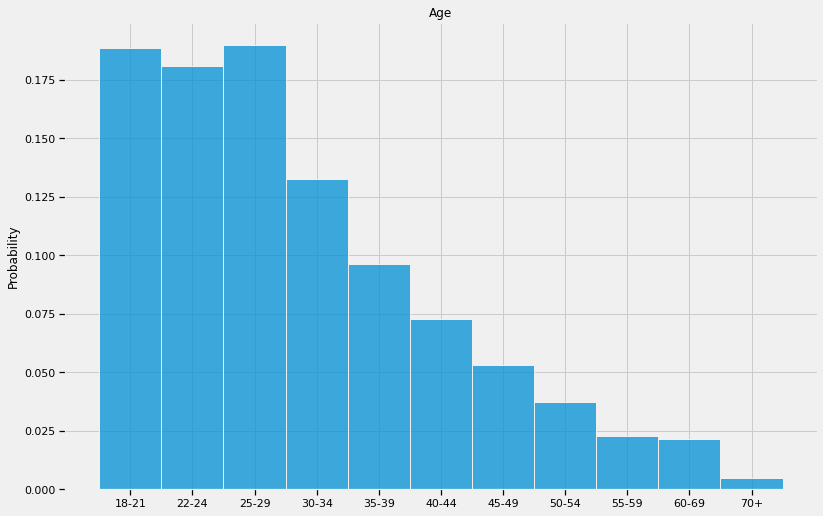

In [28]:
plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q1'][1:]), stat='probability')
plt.title("Age")
plt.show()

In [35]:
gender = list(np.unique(sorted(raw_survey['Q2'][1:]), return_counts=True))
gender[1] = gender[1]/sum(gender[1])
gender

[array(['Man', 'Nonbinary', 'Prefer not to say', 'Prefer to self-describe',
        'Woman'], dtype='<U23'),
 array([0.79305433, 0.00338813, 0.01366804, 0.00161706, 0.18827244])]

In [47]:
country = list(np.unique(raw_survey['Q3'][1:], return_counts=True))
country[1] = country[1]/sum(country[1])
country = dict(zip(country[0], country[1]))
country = sorted(country.items(), key= lambda x: x[1], reverse=True)
country = dict(country)
country

{'India': 0.28622030570207524,
 'United States of America': 0.10202903014669079,
 'Other': 0.04889693142879144,
 'Japan': 0.03545990066607631,
 'China': 0.03134023793939861,
 'Brazil': 0.02891464212836407,
 'Russia': 0.028568128441073423,
 'Nigeria': 0.027028067608670544,
 'United Kingdom of Great Britain and Northern Ireland': 0.021175836445539598,
 'Pakistan': 0.02040580602933816,
 'Egypt': 0.018557733030454705,
 'Germany': 0.018095714780733838,
 'Spain': 0.017479690447772686,
 'Indonesia': 0.017094675239671966,
 'Turkey': 0.01601663265698995,
 'France': 0.015439109844838872,
 'South Korea': 0.013822045970815848,
 'Taiwan': 0.012859507950564047,
 'Canada': 0.012744003388133831,
 'Bangladesh': 0.012204982096792823,
 'Italy': 0.011973972971932392,
 'Mexico': 0.010741924306010087,
 'Viet Nam': 0.010664921264389943,
 'Australia': 0.010164401493859007,
 'Kenya': 0.009548377160897856,
 'Colombia': 0.008662842182266199,
 'Poland': 0.008431833057405767,
 'Iran, Islamic Republic of...': 0.007

In [48]:
raw_survey['Q4'].unique()

array(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Bachelor’s degree', 'Master’s degree', 'Doctoral degree',
       'I prefer not to answer',
       'Some college/university study without earning a bachelor’s degree',
       'No formal education past high school', 'Professional doctorate'],
      dtype=object)

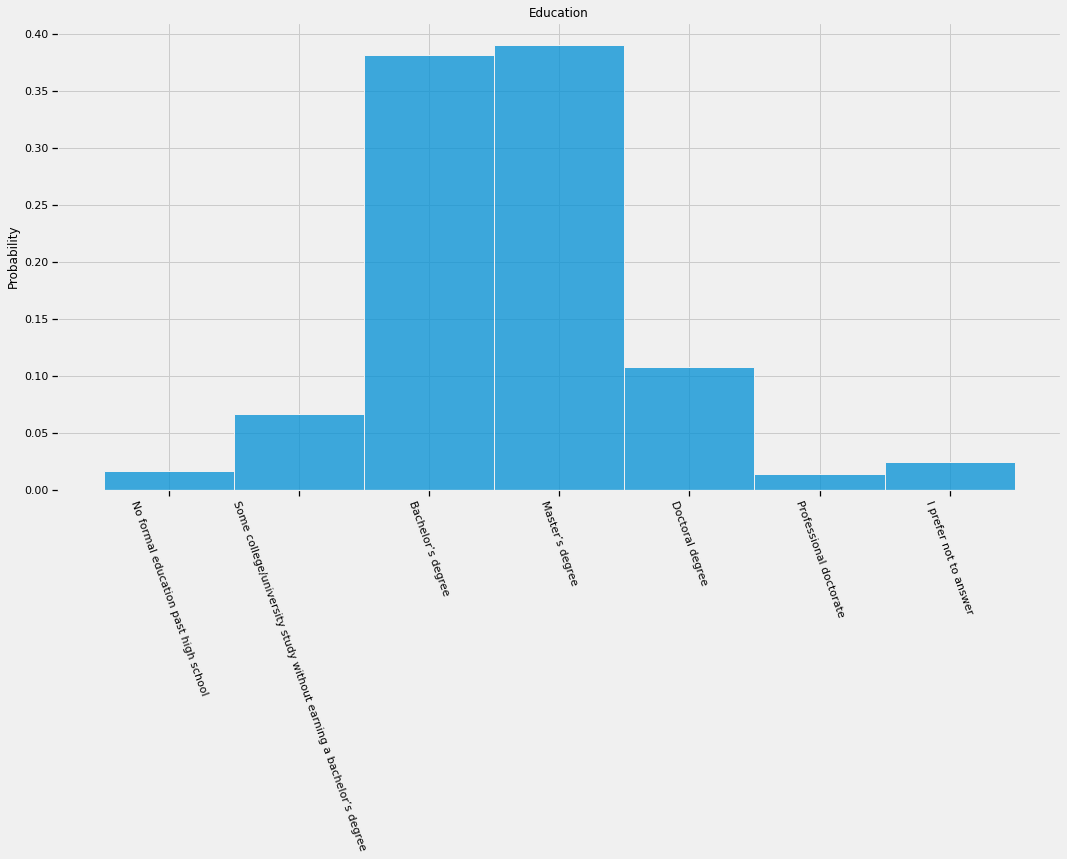

In [55]:
ed_dict = {'No formal education past high school': 0, 'Some college/university study without earning a bachelor’s degree': 0.5,
           'Bachelor’s degree': 2, 'Master’s degree': 3, 'Doctoral degree': 4,
             'Professional doctorate': 15, 'I prefer not to answer': 25}

plt.figure(figsize=(16, 8))
sns.histplot(sorted(raw_survey['Q4'][1:], key=lambda x: ed_dict[x]), stat='probability')
plt.title("Education")
plt.xticks(rotation=-70)
plt.show()

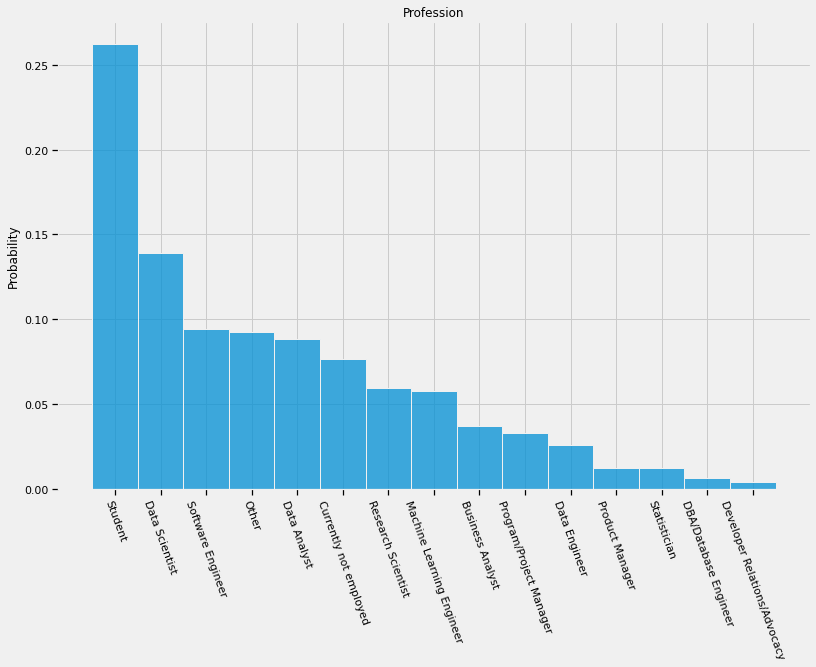

In [58]:
# count the frequency
profession = list(np.unique(raw_survey['Q5'][1:], return_counts=True))
profession[1] = profession[1]/sum(profession[1])
profession = dict(zip(profession[0], profession[1]))
# profession = sorted(profession.items(), key= lambda x: x[1], reverse=True)
# profession = dict(profession)
# profession

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q5'][1:], key=lambda x: -profession[x]), stat='probability')
plt.title("Profession")
plt.xticks(rotation=-70)
plt.show()

In [59]:
raw_survey['Q6'].unique()

array(['For how many years have you been writing code and/or programming?',
       '5-10 years', '20+ years', '1-3 years', '< 1 years', '3-5 years',
       '10-20 years', 'I have never written code'], dtype=object)

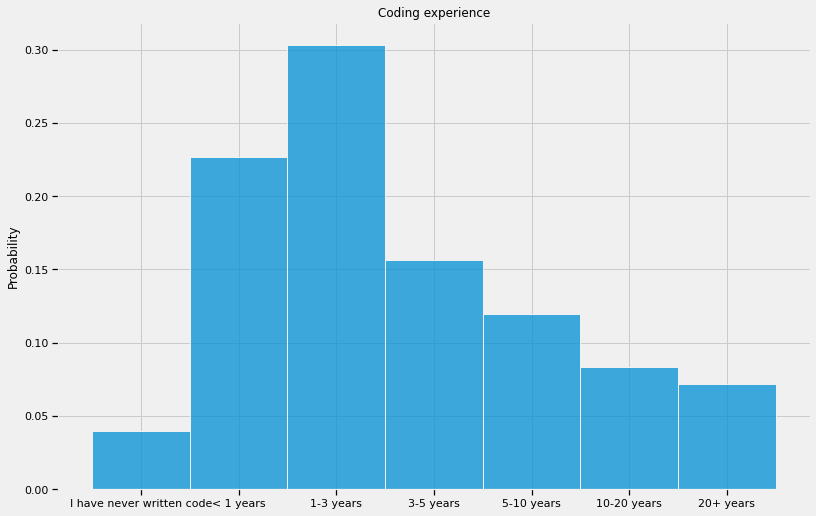

In [60]:
time_dict = {'I have never written code': 0, '< 1 years': 0.5, '1-3 years': 2, '3-5 years': 4, '5-10 years': 7.5,
             '10-20 years': 15, '20+ years': 25}

plt.figure(figsize=(12, 8))
sns.histplot(sorted(raw_survey['Q6'][1:], key=lambda x: time_dict[x]), stat='probability')
plt.title("Coding experience")
plt.show()

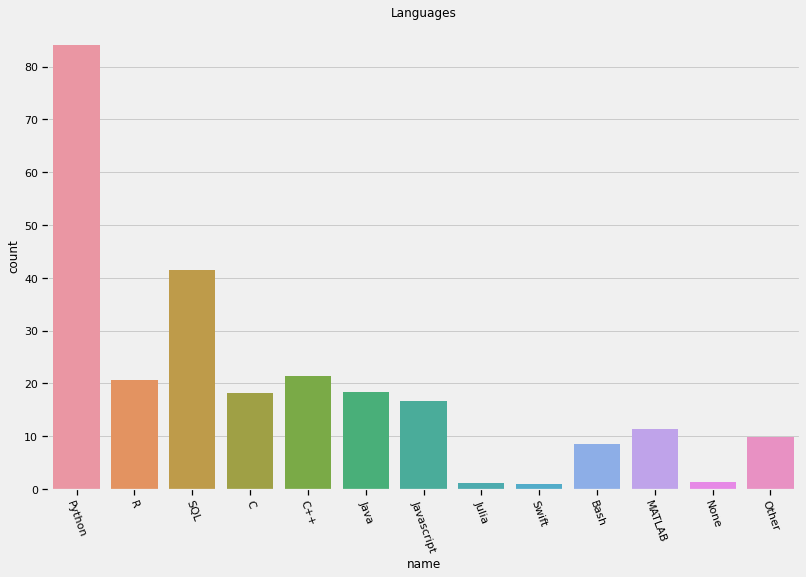

In [106]:
# count the frequency
languages = [1, 1]
languages[0] = [np.count_nonzero(~raw_survey[f'Q7_Part_{x}'][1:].isnull()) for x in range(1, 13)]
languages[0].append(np.count_nonzero(~raw_survey[f'Q7_OTHER'][1:].isnull()))
languages[0] = np.array(languages[0], dtype=float)
languages[0] /= raw_survey.shape[0] /100
languages[1] = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 
                                 'Swift', 'Bash', 'MATLAB', 'None', 'Other']
languages = pd.DataFrame({'count': languages[0], 'name': languages[1]})

plt.figure(figsize=(12, 8))
sns.barplot(data=languages, y='count', x='name')
plt.title("Languages")
plt.xticks(rotation=-70)
plt.show()

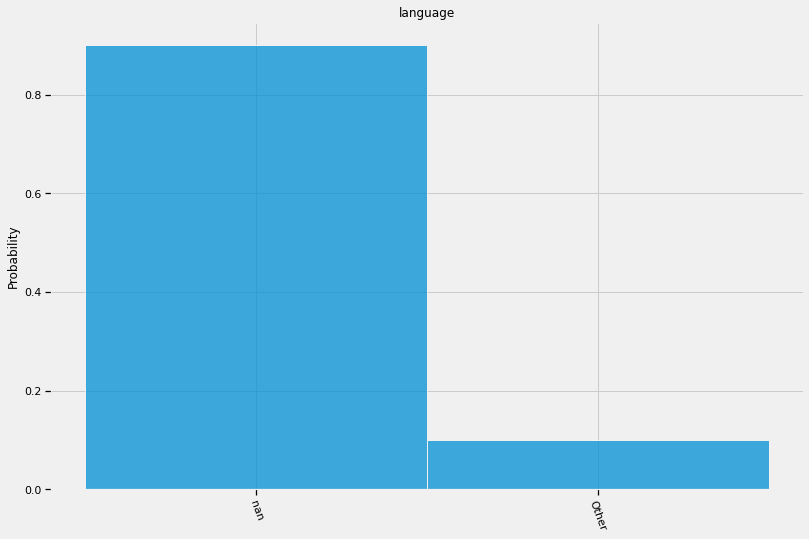

'nan'